# Classification K-Nearest Neighbours


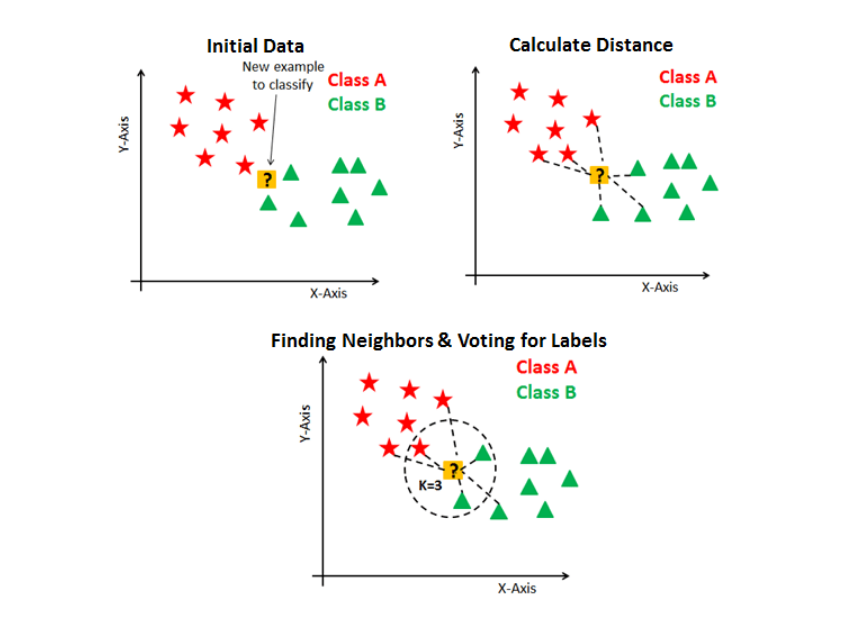

In this exercise we will work with the test dataset that sklearn offers.

The dataset consists of chemical characteristics on wine samples that may correspond to 3 different types of wines.

In [1]:
import numpy   as np
import scipy   as sc
import pandas  as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.datasets import load_wine

In [2]:
wine_data = load_wine()

X = wine_data.data
Y = wine_data.target

## 1. Classifying with KNN
---
**Task:** Use Sklearn to generate a 70%/30% random partition of the dataset to generate the *X_train* and *Y_train* sets and also an *X_test* and *Y_test.* Then make use of the KNeighborsClassifier model library to classify each wine bottle, and evaluate the quality of your model.

1. Report the results of performing the training and evaluation of the model from using normalized and unnormalized input variables. **Which one yields the best result?

2. Repeat the training and evaluation for different values of *k*, in a range varying from 1 to 30. Obtain for each model its validation error and visualize in a graph what is the evolution of the validation error with respect to the variation of *k*. **Would it be correct to choose the value of k that yields the best result?

3. Try the selection of the hyperparameter *k* using the k-fold Cross-Validation technique. In the following tutorial you will find the Sklearn documentation to understand how to make use of this method: https://scikit-learn.org/stable/modules/cross_validation.html



4.66735072755122e-16 1.0



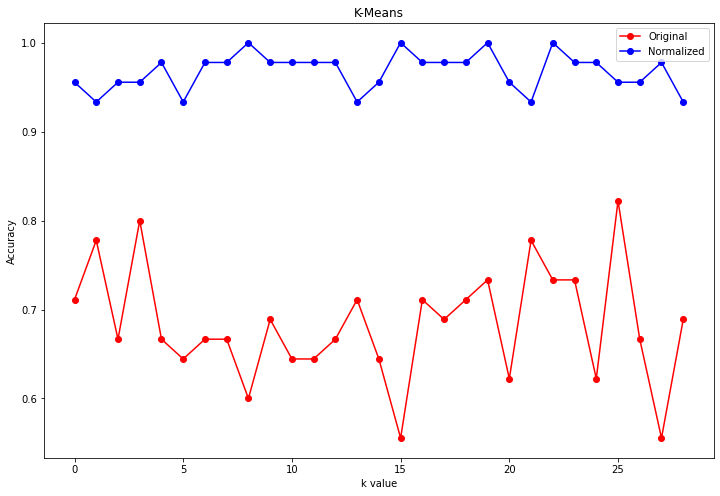

In [3]:
from sklearn.neighbors       import KNeighborsClassifier
from sklearn.preprocessing   import StandardScaler
from sklearn.model_selection import train_test_split

# Sections 1) and 2)

# Normalize the variables
Xn = StandardScaler().fit_transform(X)

# Check that X is normalized with mean=1 and std=0.
print(np.mean(Xn), np.std(Xn))

k_max   = 30
results = np.zeros((k_max-1, 2))

# Iterate for different values of k
for i in range(1, k_max):

  # Train the model with original data
  X_train, X_test, y_train, y_test = train_test_split(X, Y)
  model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  results[i-1, 0] = model.score(X_test, y_test)

  # Train the model with normalized data
  X_train, X_test, y_train, y_test = train_test_split(Xn, Y)
  model = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  results[i-1, 1] = model.score(X_test, y_test)

# This is to make the plot bigger
from matplotlib.pyplot import figure
figure(num=None, figsize=(12, 8))

plt.plot(range(len(results)), results[:, 0], "-ro", label='Original')
plt.plot(range(len(results)), results[:, 1], "-bo", label='Normalized')
plt.title('K-Means')
plt.xlabel('k value')
plt.ylabel('Accuracy')
plt.legend()

print("")

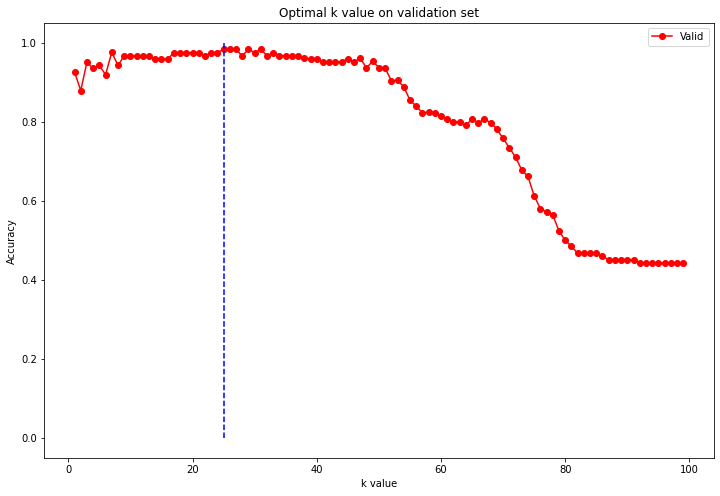

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold


# Section 3)

for _ in range(1):

  # Normalize the input matrix
  Xn = StandardScaler().fit_transform(X)

  # Generate the train and test sets
  X_TR, X_test, Y_TR, Y_test = train_test_split(Xn, Y, test_size=0.3)

  accuracy_tr = []

  _K = range(1, 100)

  # Create the object that will generate the CV combinations
  kf = KFold(n_splits=10)

  accuracy_tr = []

  for k in _K:

    neigh = KNeighborsClassifier(n_neighbors=k)

    accuracy_tr.append(np.mean(cross_val_score(neigh, X_TR, Y_TR, cv=10)))

  figure(num=None, figsize=(12, 8))  
  plt.plot(_K, accuracy_tr, "-ro", label="Valid", alpha=1)

  # Check in the test dataset if selected k is giving the best accuracy

  opt_k = np.argmax(accuracy_tr)+1
  
  plt.plot([opt_k, opt_k], [0, 1], 'b--', alpha=1)
  plt.xlabel("k value")
  plt.ylabel("Accuracy")
  plt.title("Optimal k value on validation set")
  plt.legend()

plt.show()

## 2. (Bonus) Visualazing KNN
---

**Task:** Implement a function ***visualize_KNN($X_1$, $X_2$, $Y$, $k$, $dist$)*** that takes as input parameters two input variables $x1$ and $x2$ and the label vector $Y$ , to visualize a scatter plot where these two input variables are plotted, identifying by color the type of class they belong to. This function must use the input parameters $k$ (number of values to use for KNN) and $dist$ (type of function that measures the distance between two points) to make a KNN that predicts the class for all the combinations of points that can be generated in this scatter plot, in order to overprint a color map that shows the decision boundary of the model. In the following image you can see an example of the expected result:

<img src="https://scikit-learn.org/stable/_images/sphx_glr_plot_classification_0021.png">

Once the function is implemented, try plotting different variables, for different values of K and distance functions.

1. How does the behavior of the predictions vary as we vary the value of K?

2. How does the prediction behavior vary with different types of distance functions?



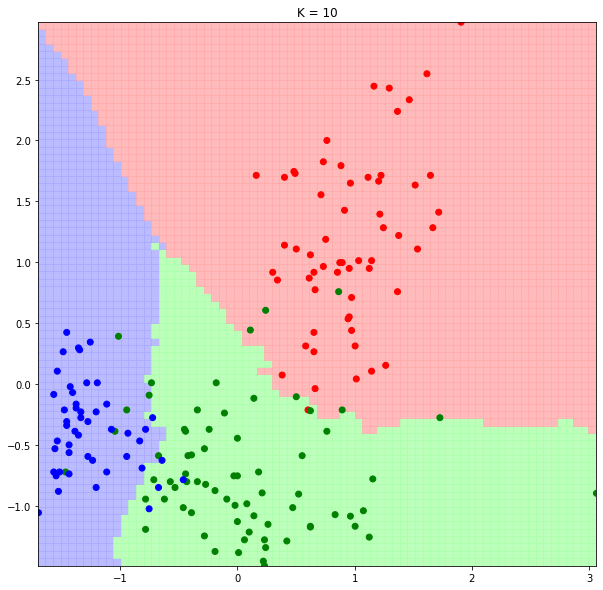

In [5]:
from matplotlib.colors import ListedColormap

_x1 = X[:,  6: 7]
_x2 = X[:, 12:13]

# Euclidian distance between 2 points
dist = lambda a, b: np.sqrt(np.sum(np.power(a - b,2)))

def visualize_knn(x1, x2, Y, k, dist):
  
  n_x1 = (x1 - np.mean(x1)) / np.std(x1)
  n_x2 = (x2 - np.mean(x2)) / np.std(x2)
  
  resolution = 75
  
  # Values of the X and Y axis in the grid
  gx = np.linspace(np.min(n_x1), np.max(n_x1), resolution)
  gy = np.linspace(np.min(n_x2), np.max(n_x2), resolution)  
  
  # Empty matrix for the grid
  zz = np.zeros((len(gx), len(gy)))

  # Generate thex and y coordinated for each point of the grid
  xx, yy = np.meshgrid(gx, gy)
   
  # Iterate over each coordinate of the grid
  for ix in range(len(gx)):
    for iy in range(len(gy)):
        
        # Generate the point of the grid
        grid_p = np.array([xx[ix, iy], 
                           yy[ix, iy]]).reshape(2,1)
        
        # Calculate the distance between each point of the grid and the dataset points
        distances = [dist(np.array([n_x1[ip], n_x2[ip]]), grid_p) for ip in range(len(x1))]
        # Save the k nearest indexs
        k_index = np.argsort(distances)[:k]
        # Generate the probabilities for each class
        probs = np.bincount(Y[k_index], minlength=3) / k
        # Choose the class with the highest probability
        pred = np.argmax(probs)
        
        zz[ix, iy] = pred

  color = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
  
  plt.figure(figsize=(10, 10))
  plt.title("K = " + str(k))
  plt.pcolor(xx, yy, zz, cmap=color, alpha=0.8) 
  
  plt.scatter(n_x1, n_x2, c=[{0 : "red", 
                              1 : "green", 
                              2 : "blue"}[k] for k in Y])
  
visualize_knn(_x1, _x2, Y, 10, dist)